# Rayos UV y capa de Ozono en la ciudad de Madrid

## Valores de Ozono por Meses en la Estación : Madrid (AEMET - CRN - Ciudad universitaria)

### Datos de 2012 a 2015

In [463]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import pylab
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 15

In [400]:
ozono_data = pd.read_csv('ozono3.csv', sep=';', decimal = '.')
ozono_data.head(10)

,Mes,Ozono,Medio,Maximo,DiaMaximo,Minimo,DiaMinimo,Year
0,Enero,88.087,2.842,3.586,16.0,2.440,6.0,2012
1,Febrero,97.661,3.368,3.917,4.0,2.787,18.0,2012
2,Marzo,NaN,NaN,NaN,NaN,NaN,NaN,2012
3,Abril,111.442,3.715,4.656,29.0,3.336,1.0,2012
4,Mayo,104.135,3.359,4.128,1.0,2.884,12.0,2012
5,Junio,95.601,3.187,3.430,3.0,2.973,27.0,2012
6,Julio,98.434,3.175,3.383,27.0,2.963,17.0,2012
7,Agosto,92.744,2.992,3.409,6.0,2.813,10.0,2012
8,Septiembre,90.054,3.002,3.216,26.0,2.822,21.0,2012
9,Octubre,88.028,2.840,3.199,30.0,2.528,22.0,2012


In [401]:
# Comprobamos cuánto missing data tenemos
empty = ozono_data.apply(lambda col: pd.isnull(col))
empty.sum()

Mes          0
Ozono        2
Medio        2
Maximo       2
DiaMaximo    2
Minimo       2
DiaMinimo    2
Year         0
dtype: int64

In [402]:
ozono_data_reduced = ozono_data.drop(['Mes', 'Year', 'DiaMaximo', 'DiaMinimo', 'Maximo', 'Minimo', 'Medio'], axis = 1, inplace=False)
ozono_data_reduced.head(5)

,Ozono
0,88.087
1,97.661
2,NaN
3,111.442
4,104.135


In [403]:
#Rellenamos los NaNs

ozono_data_reduced = ozono_data_reduced.fillna(ozono_data.mean())
ozono_data_reduced.head(5)

,Ozono
0,88.087000
1,97.661000
2,96.527217
3,111.442000
4,104.135000


In [404]:
ozono_data_reduced.dtypes

Ozono    float64
dtype: object

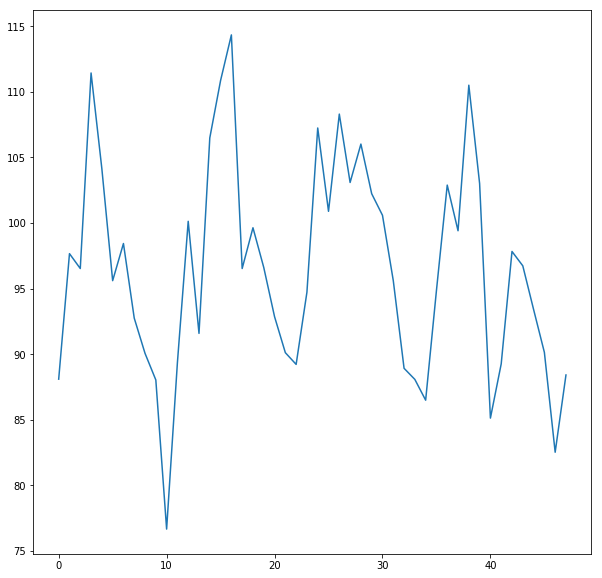

In [405]:
plt.plot(ozono_data_reduced)

In [406]:
ozono_data_reduced2 = ozono_data.drop(['Mes','DiaMaximo', 'DiaMinimo', 'Maximo', 'Minimo', 'Medio'], axis = 1, inplace=False)
ozono_data_reduced2.head(5)

,Ozono,Year
0,88.087,2012
1,97.661,2012
2,NaN,2012
3,111.442,2012
4,104.135,2012


In [407]:
#ozono_data = ozono_data.set_index(['Year'])
ozono_data_grouped = ozono_data_reduced2.groupby(['Year']).mean()
ozono_data_grouped.head(5)

,Ozono
Year,
2012,93.835545
2013,98.778182
2014,98.524833
2015,94.933583


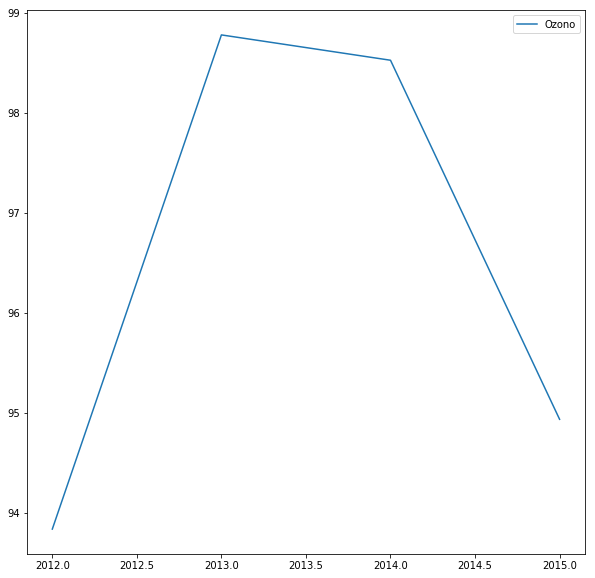

In [408]:
plt.plot(ozono_data_grouped)
plt.legend(ozono_data_grouped)

## Valores de Radiación Ultravioleta (UVI) por Meses en la Estación : Madrid (AEMET - CRN - Ciudad universitaria)

### Datos de 2012 a 2016

In [409]:
uv_data = pd.read_csv('ultravioleta4.csv', sep=';', decimal = '.')
uv_data.head(5)

,Mes,TotalRadiacion,Media diaria,Indice B máximo mensual,Día del índice máximo,Hora del índice máximo,Máxima diaria,Día de la máxima diaria,Year
0,Enero,25.332,817.000,"2,7",30,"12,3",1.106,30,2012
1,Febrero,38.238,1.319,"4,5",26,12,1.951,26,2012
2,Marzo,71.193,2.297,"6,9",29,12,3.463,29,2012
3,Abril,79.172,2.639,"8,5",23,"12,3",4.245,24,2012
4,Mayo,139.677,4.506,"10,9",13,13,6.035,14,2012


In [410]:
uv_data_reduced = uv_data[['Year', 'TotalRadiacion']]
uv_data_reduced.head(5)

,Year,TotalRadiacion
0,2012,25.332
1,2012,38.238
2,2012,71.193
3,2012,79.172
4,2012,139.677


In [411]:
uv_data_reduced2 = uv_data[['TotalRadiacion']]
uv_data_reduced2.head(5)

,TotalRadiacion
0,25.332
1,38.238
2,71.193
3,79.172
4,139.677


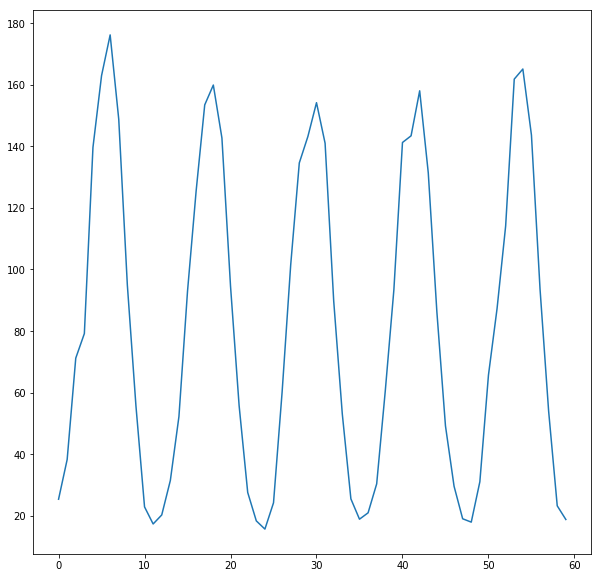

In [412]:
plt.plot(uv_data_reduced2)

In [413]:
uv_data_grouped = uv_data.groupby(['Year']).mean()
uv_data_grouped.head(5)

,TotalRadiacion,Media diaria,Día del índice máximo,Máxima diaria,Día de la máxima diaria
Year,,,,,
2012,86.037667,180.636833,16.333333,69.589000,15.416667
2013,81.221417,182.413167,13.166667,79.738167,12.416667
2014,80.146083,237.639333,12.916667,149.269583,13.166667
2015,80.282417,191.774000,15.583333,145.200083,16.416667
2016,81.347500,165.416417,16.750000,76.724667,15.583333


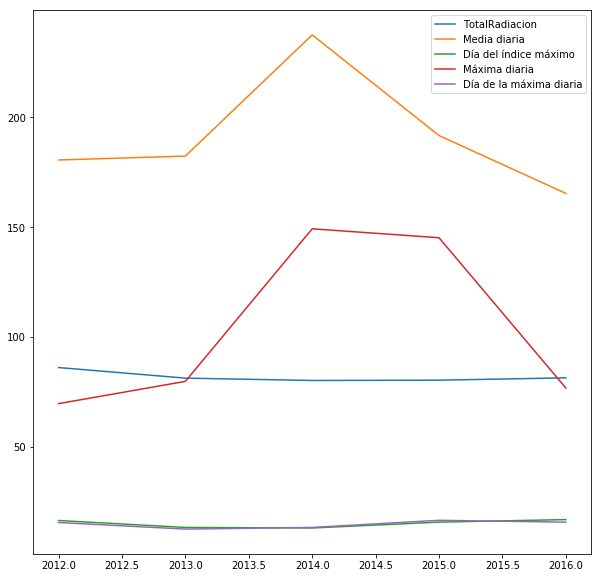

In [414]:
plt.plot(uv_data_grouped)
plt.legend(uv_data_grouped)

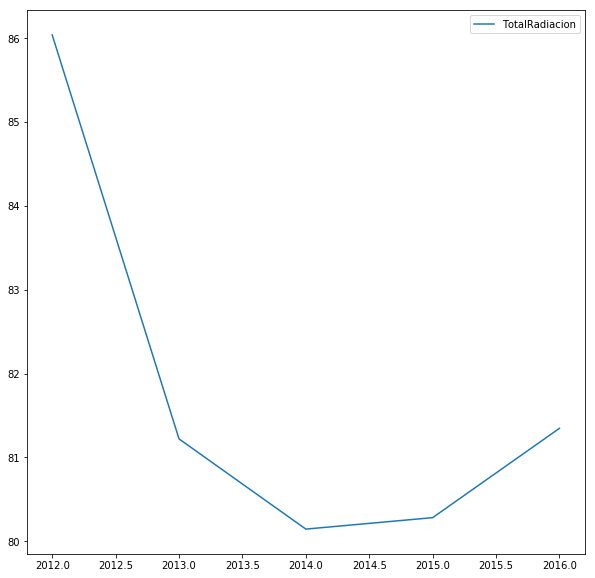

In [415]:
uv_data_grouped2 = uv_data_reduced.groupby(['Year']).mean()
plt.plot(uv_data_grouped2)
plt.legend(uv_data_grouped2)

# Cimatología en la ciudad de Madrid

## Temperaturas medias y Precipitaciones. (Observatorio de Retiro)

### Datos de 2010 a 2016

In [416]:
temp_precip_data = pd.read_csv('temp_precip.csv', sep=';',decimal = ',')
temp_precip_data.head(5)
temp_precip_data.columns

Index(['Mes', 'Temperatura media máxima (ºC)',
       'Temperatura media máxima / valor normal (ºC)',
       'Temperatura media mínima (ºC)',
       'Temperatura media mínima / valor normal (ºC)',
       'Temperatura media mensual (ºC)',
       'Temperatura media mensual / valor normal (ºC)',
       'Precipitaciones / Total (mm.)', 'Precipitaciones / Valor normal (mm.)',
       'Precipitaciones / Valor maximo (mm.)',
       'Precipitaciones / Valor minimo (mm.)', 'Year'],
      dtype='object')

In [417]:
temp_precip_data.drop(['Mes', 'Temperatura media mensual / valor normal (ºC)', 'Temperatura media máxima (ºC)', 'Temperatura media mínima (ºC)', 'Temperatura media máxima / valor normal (ºC)','Precipitaciones / Valor normal (mm.)','Temperatura media mínima / valor normal (ºC)', 'Precipitaciones / Valor maximo (mm.)', 'Precipitaciones / Valor minimo (mm.)'], axis = 1, inplace=True)
temp_precip_data.head(5)

,Temperatura media mensual (ºC),Precipitaciones / Total (mm.),Year
0,5.4,61.0,2010
1,6.4,112.3,2010
2,9.3,59.7,2010
3,14.3,47.8,2010
4,16.2,22.7,2010


In [418]:
temp_precip_data_grouped = temp_precip_data.groupby(['Year']).mean()
temp_precip_data_grouped.head(5)

,Temperatura media mensual (ºC),Precipitaciones / Total (mm.)
Year,,
2010,14.708333,46.441667
2011,16.041667,31.700000
2012,15.183333,27.591667
2013,15.025000,31.083333
2014,16.066667,34.775000


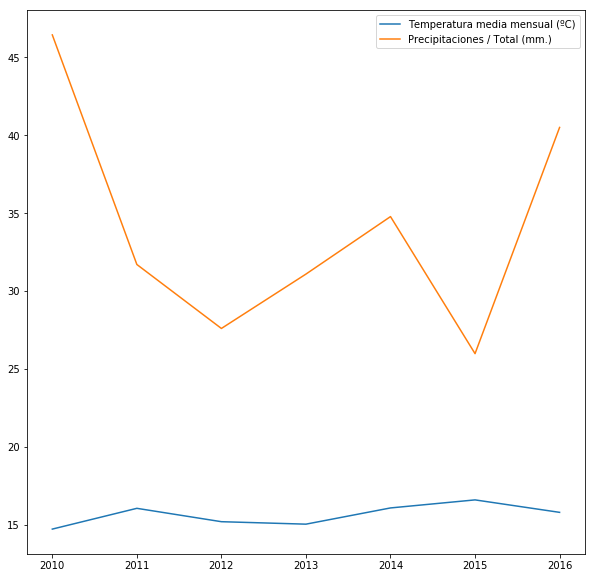

In [419]:
plt.plot(temp_precip_data_grouped)
plt.legend(temp_precip_data_grouped)

## Valores medios de los Contaminantes detectados en el aire por Meses

### Datos de 2010 a 2016

In [420]:
contaminacion_aire_data = pd.read_csv('contaminacion_aire.csv', sep=';', decimal = ',')
contaminacion_aire_data.head(5)

,Mes,Particulas suspension (gr/m3),SO2 (gr/m3),CO (mg/m3),O3 (gr/m3),NO2 (gr/m3),NOX (gr/m3),BEN (gr/m3),CH4 (mg/m3),TCH (mg/m3),HCNM (mg/m3),TEMP (C),Year
0,Total anual,22.0,10.0,"0,4",48.0,44.0,68.0,"0,8","1,2","1,4","0,2","15,8",2010
1,Enero,16.0,12.0,"0,4",31.0,47.0,80.0,1,"1,2","1,5","0,2","6,6",2010
2,Febrero,15.0,12.0,"0,4",41.0,46.0,69.0,"0,9","1,3","1,5","0,2","7,4",2010
3,Marzo,25.0,12.0,"0,4",51.0,41.0,61.0,"0,8","1,3","1,5","0,2","10,2",2010
4,Abril,19.0,10.0,"0,3",63.0,38.0,51.0,"0,6","1,3","1,4","0,2","15,6",2010


In [421]:
contaminacion_aire_data.drop(['Mes'], axis = 1, inplace=True)
contaminacion_aire_data_grouped = contaminacion_aire_data.groupby(['Year']).mean()
contaminacion_aire_data_grouped.head(5)

,Particulas suspension (gr/m3),SO2 (gr/m3),O3 (gr/m3),NO2 (gr/m3),NOX (gr/m3)
Year,,,,,
2010,21.692308,9.615385,47.692308,44.153846,67.692308
2011,23.307692,7.000000,45.000000,44.923077,88.230769
2012,21.769231,4.461538,41.076923,38.615385,76.461538
2013,18.307692,4.307692,49.923077,34.769231,65.615385
2014,19.153846,5.000000,51.461538,35.000000,65.769231


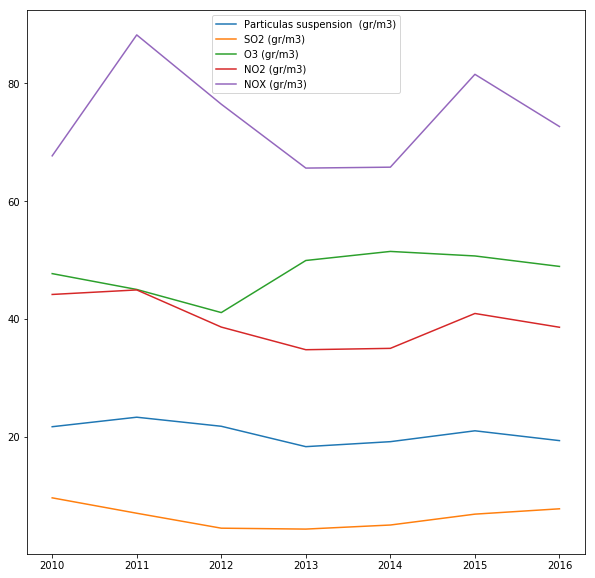

In [422]:
plt.plot(contaminacion_aire_data_grouped)
plt.legend(contaminacion_aire_data_grouped)

[['Ozono'], ['Particulas suspension  (gr/m3)', 'SO2 (gr/m3)', 'O3 (gr/m3)', 'NO2 (gr/m3)', 'NOX (gr/m3)'], ['Temperatura media mensual (ºC)', 'Precipitaciones / Total (mm.)'], ['TotalRadiacion']]


'\nplt.legend(contaminacion_aire_data_grouped)\nplt.legend(temp_precip_data_grouped.columns, contaminacion_aire_data_grouped.columns)\nplt.legend(uv_data_grouped2.columns)\n'

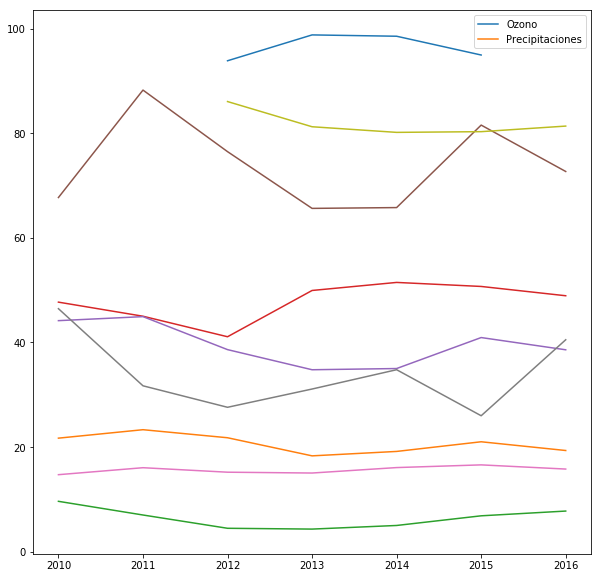

In [434]:
plt.plot(ozono_data_grouped)
plt.plot(contaminacion_aire_data_grouped)
plt.plot(temp_precip_data_grouped)
plt.plot(uv_data_grouped2)

leg = []
leg.append(list(ozono_data_grouped.columns))
leg.append(list(contaminacion_aire_data_grouped.columns))
leg.append(list(temp_precip_data_grouped.columns))
leg.append(list(uv_data_grouped2.columns))

plt.legend(['Ozono', 'Particulas suspension', '''Precipitaciones', ])

print(leg)

'''
plt.legend(contaminacion_aire_data_grouped)
plt.legend(temp_precip_data_grouped.columns, contaminacion_aire_data_grouped.columns)
plt.legend(uv_data_grouped2.columns)
'''

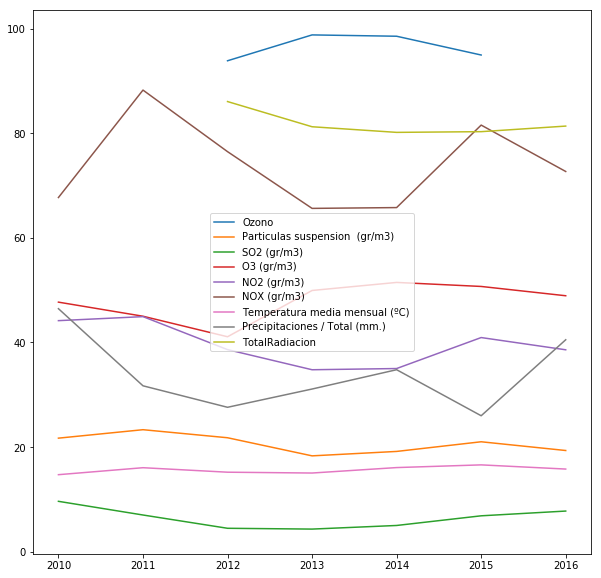

In [461]:
frames = [ozono_data_grouped, contaminacion_aire_data_grouped, temp_precip_data_grouped, uv_data_grouped2]

result = pd.concat(frames, axis=1)

plt.plot(result)
plt.legend(result)



In [452]:
result.head(10)

,Ozono,Particulas suspension (gr/m3),SO2 (gr/m3),O3 (gr/m3),NO2 (gr/m3),NOX (gr/m3),Temperatura media mensual (ºC),Precipitaciones / Total (mm.),TotalRadiacion
Year,,,,,,,,,
2010,NaN,21.692308,9.615385,47.692308,44.153846,67.692308,14.708333,46.441667,NaN
2011,NaN,23.307692,7.000000,45.000000,44.923077,88.230769,16.041667,31.700000,NaN
2012,93.835545,21.769231,4.461538,41.076923,38.615385,76.461538,15.183333,27.591667,86.037667
2013,98.778182,18.307692,4.307692,49.923077,34.769231,65.615385,15.025000,31.083333,81.221417
2014,98.524833,19.153846,5.000000,51.461538,35.000000,65.769231,16.066667,34.775000,80.146083
2015,94.933583,21.000000,6.846154,50.692308,40.923077,81.538462,16.583333,25.975000,80.282417
2016,NaN,19.330769,7.753846,48.915385,38.584615,72.669231,15.783333,40.500000,81.347500


In [453]:
result_fillna = result.fillna(result.mean())

In [454]:
result_fillna.head(10)

,Ozono,Particulas suspension (gr/m3),SO2 (gr/m3),O3 (gr/m3),NO2 (gr/m3),NOX (gr/m3),Temperatura media mensual (ºC),Precipitaciones / Total (mm.),TotalRadiacion
Year,,,,,,,,,
2010,96.518036,21.692308,9.615385,47.692308,44.153846,67.692308,14.708333,46.441667,81.807017
2011,96.518036,23.307692,7.000000,45.000000,44.923077,88.230769,16.041667,31.700000,81.807017
2012,93.835545,21.769231,4.461538,41.076923,38.615385,76.461538,15.183333,27.591667,86.037667
2013,98.778182,18.307692,4.307692,49.923077,34.769231,65.615385,15.025000,31.083333,81.221417
2014,98.524833,19.153846,5.000000,51.461538,35.000000,65.769231,16.066667,34.775000,80.146083
2015,94.933583,21.000000,6.846154,50.692308,40.923077,81.538462,16.583333,25.975000,80.282417
2016,96.518036,19.330769,7.753846,48.915385,38.584615,72.669231,15.783333,40.500000,81.347500


In [456]:
result_fillna.to_csv('curro.csv', sep = ';')

In [457]:
result_fillna_reduced = result_fillna.iloc[:-2,:]
result_fillna_reduced.head(5)

,Ozono,Particulas suspension (gr/m3),SO2 (gr/m3),O3 (gr/m3),NO2 (gr/m3),NOX (gr/m3),Temperatura media mensual (ºC),Precipitaciones / Total (mm.),TotalRadiacion
Year,,,,,,,,,
2010,96.518036,21.692308,9.615385,47.692308,44.153846,67.692308,14.708333,46.441667,81.807017
2011,96.518036,23.307692,7.000000,45.000000,44.923077,88.230769,16.041667,31.700000,81.807017
2012,93.835545,21.769231,4.461538,41.076923,38.615385,76.461538,15.183333,27.591667,86.037667
2013,98.778182,18.307692,4.307692,49.923077,34.769231,65.615385,15.025000,31.083333,81.221417
2014,98.524833,19.153846,5.000000,51.461538,35.000000,65.769231,16.066667,34.775000,80.146083


In [458]:
result_fillna_reduced.to_csv('curro_reduced.csv', sep = ';')

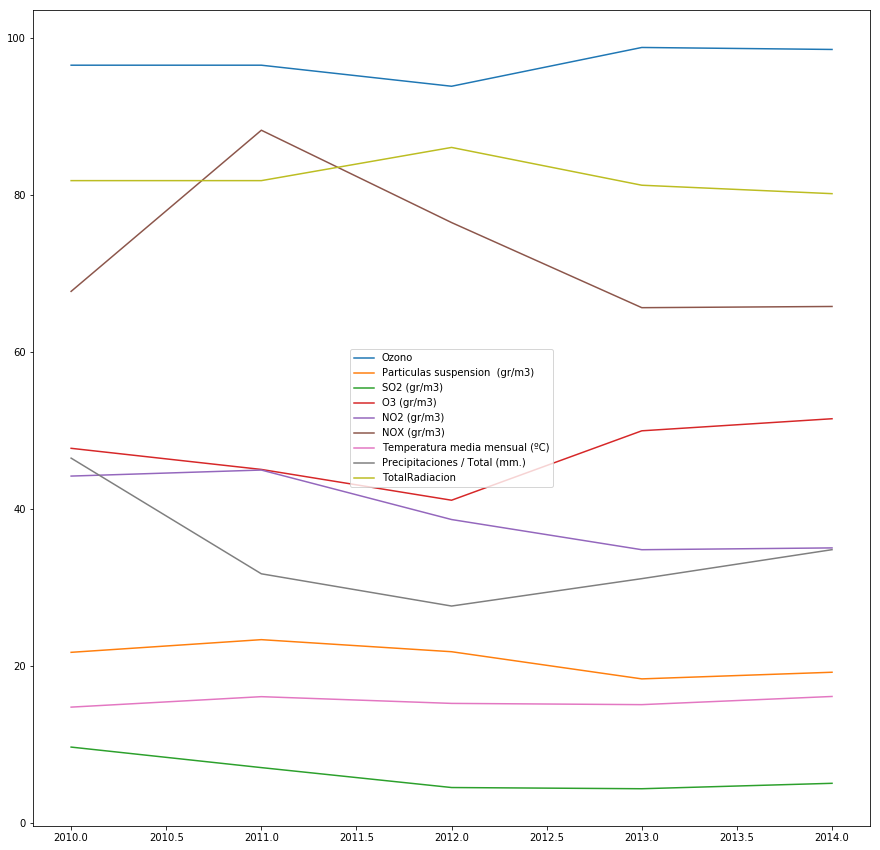

In [464]:
plt.plot(result_fillna_reduced)
plt.legend(result_fillna_reduced)
